In [1]:
from bigraph_viz import plot_bigraph, pf

## we need to define the NETISCE interface
What are the ports which expose variables that will connect with the environment and with other cells?

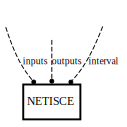

In [39]:
netisce_schema = {
    '_ports': {
        'inputs': 'Any',
        'outputs': 'Any',
        'interval': 'Any',
    }
}

netisce_process = {
    'NETISCE': netisce_schema
}

plot_bigraph(netisce_process)

## inside NETISCE
We can make a map of the network inside of netisce

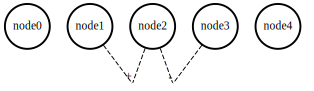

In [38]:
n_nodes = 5
nodes = {f'node{i}': 'Any' for i in range(n_nodes)}

netisce_internal = {
    **nodes,
    '+': {
        'wires': {
            '1': 'node1',
            '2': 'node2',
        }
    },
    '-': {
        'wires': {
            '1': 'node2',
            '2': 'node3',
        }
    }
}

plot_bigraph(netisce_internal, collapse_processes=True, port_labels=False)

## Netisce can be bundled into a process, and we need to expose a set of its nodes

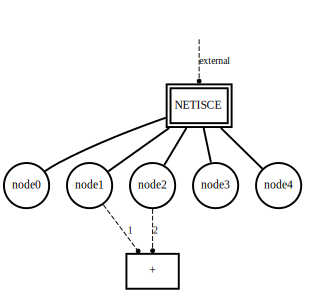

In [25]:
netisce_composite = {
    'NETISCE': {
        **netisce_internal,
        '_ports': {
            'external': 'Any'
        }
    }
}

plot_bigraph(netisce_composite, remove_process_place_edges=True)

## the netisce process

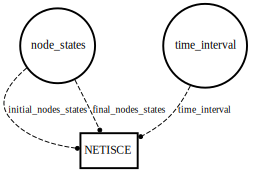

In [34]:
netisce_process = {
    'NETISCE': {
        '_ports': {
            'initial_nodes_states': 'array[bool]',  # Really, this should be a subset of the nodes. The vertex nodes. The external-facing nodes.
            'final_nodes_states': 'array[bool]',
            'time_interval': 'float',  # NETISCE needs to tell vivarium how long in simulation time its update takes
        },
        'wires': {
            'initial_nodes_states': 'node_states',
            'final_nodes_states': 'node_states',
            'time_interval': 'time_interval',
        }
    }
}

plot_bigraph(netisce_process)

## set up multiple netisce processes

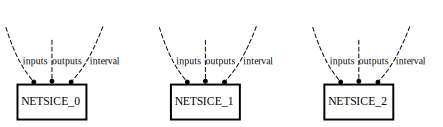

In [41]:
n_netisce = 3

netisce_processes = {
    f'NETSICE_{i}': netisce_schema for i in range(n_netisce)}

plot_bigraph(netisce_processes)

## next up: connect them